**5. (Optional) Cài lại bài Linear regression và Logistic regression dùng Gradient tape trong tensorflow.**

**- Linear Regression** 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# read data
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# min-max normalization
normalized_df = (df - df.min()) / (df.max() - df.min())
normalized_df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732


In [4]:
# convert to numpy
X = normalized_df.iloc[:, :-1].to_numpy()
y = normalized_df.iloc[:, -1].to_numpy()
y = y.reshape((-1, 1))

In [5]:
# concatenation [1 X]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [6]:
# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[inds]

In [7]:
# split into train, valuation and test set
X_train, X_val, X_test, y_train, y_val, y_test = X[:140, :], X[140:170, :], X[170:, :], \
                                                 y[:140], y[140:170], y[170:]
X_train_size = X_train.shape[0]
inds = np.arange(X_train_size)

In [8]:
# predict    
def predict(x, W):
    return x @ W

In [9]:
# training
learning_rate = 0.1
num_epochs = 500

In [10]:
# loss function
loss = tf.keras.losses.MeanSquaredError()

W:  [[ 0.11603106]
 [ 0.65327311]
 [ 0.22811489]
 [-0.06451544]]
Test loss:  0.007184356916695833


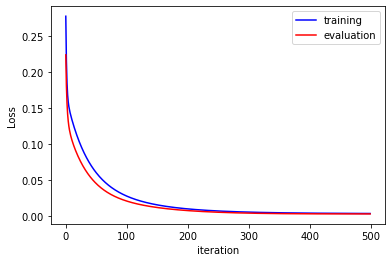

In [11]:
# initialize weight
W = tf.Variable(tf.random.normal((4, 1), dtype=tf.float64))

# for debug
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[inds]
    with tf.GradientTape() as t:
        # output
        output = predict(X_train, W)
        
        # loss
        loss_v = loss(y_train, output)
        train_losses.append(loss_v.numpy())
        
        # gradient
        dW = t.gradient(loss_v, W)
        
        # update
        W.assign_sub(learning_rate * dW)

    # evaluation
    val_losses.append(loss(y_val, predict(X_val, W)).numpy())

print('W: ', W.numpy())
print('Test loss: ', loss(y_test, predict(X_test, W)).numpy())
    
# plotting
plt.plot(train_losses, color='b', label='training')
plt.plot(val_losses, color='r', label='evaluation')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

**- Logistics Regression** 

In [12]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import tensorflow as tf
%matplotlib inline

In [13]:
iris = np.genfromtxt('iris_full_2class.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:4]
y = iris[:, 4]
y = y.reshape((-1, 1))

In [14]:
# normalization
maxi = np.max(X, axis=0)
mini = np.min(X, axis=0)
X = (X-mini) / (maxi-mini)

In [15]:
# concatenation [1 X]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [16]:
# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[inds]

In [17]:
# split into train, valuation and test set
X_train, X_val, X_test, y_train, y_val, y_test = X[:70, :], X[70:80, :], X[80:, :], \
                                                 y[:70], y[70:80], y[80:]
X_train_size = X_train.shape[0]
inds = np.arange(X_train_size)

In [18]:
# predict    
def predict(x, W):
    return tf.math.sigmoid(x @ W)

In [19]:
# training
learning_rate = 0.1
num_epochs = 500

In [20]:
# loss function
loss = tf.keras.losses.BinaryCrossentropy()

W:  [[-1.53369994]
 [ 0.83653931]
 [-1.85574494]
 [ 2.90129062]
 [ 2.39244463]]
Testing loss:  0.12267597019672394
Testing accuracy:  1.0


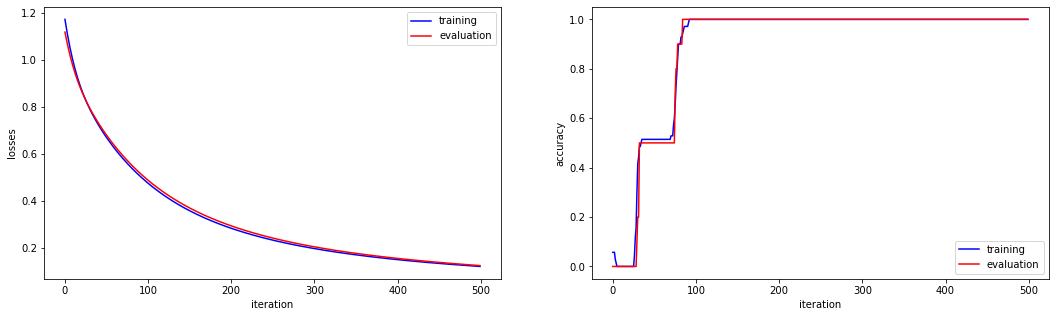

In [21]:
# initialize weight
W = tf.Variable(tf.random.normal((5, 1), dtype=tf.float64))

# for debug
train_losses = []
val_losses = []
train_acc = []
val_acc = []

for epoch in range(num_epochs):
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[inds]
    with tf.GradientTape() as t:
        # output
        output = predict(X_train, W)
        
        # loss
        loss_v = loss(y_train, output)
        train_losses.append(loss_v.numpy())
        
        # gradient
        dW = t.gradient(loss_v, W)
        
        # update
        W.assign_sub(learning_rate * dW)
    
    # accuracy
    output = predict(X_train, W)
    preds = output.numpy().round()
    acc = (preds == y_train).mean()
    train_acc.append(acc)
        
    # evaluation
    output = predict(X_val, W)
    loss_v = loss(y_val, output)
    val_losses.append(loss_v.numpy())
    preds = output.numpy().round()
    acc = (preds == y_val).mean()
    val_acc.append(acc)

print("W: ", W.numpy())
print('Testing loss: ', loss(y_test, predict(X_test, W)).numpy())
print('Testing accuracy: ',(predict(X_test, W).numpy().round() == y_test).mean()) 

# plotting
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(train_losses, color='b', label='training')
axs[0].plot(val_losses, color='r', label='evaluation')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(train_acc, color='b', label='training')
axs[1].plot(val_acc, color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='accuracy')
axs[0].legend()
axs[1].legend()